**Data Viewer**

In [4]:
import logging
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from dataloader import load_data
from helpers import get_cat_dims
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, f1_score
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE)
from imblearn.under_sampling import (RandomUnderSampler, NearMiss, EditedNearestNeighbours, TomekLinks)
from imblearn.combine import (SMOTEENN, SMOTETomek)
logging.getLogger().setLevel(logging.INFO)


## german

In [10]:
# Dataset exploration function
def explore_dataset(df, cat_cols, num_cols, target_col):
    print("### Dataset Overview ###")
    print(df.info())
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\n### Missing Values ###")
    print(missing_values[missing_values > 0])

    # Summary statistics
    print("\n### Summary Statistics ###")
    print(df.describe(include='all'))
    
    # Target distribution
    print("\n### Target Distribution ###")
    print(Counter(df[target_col]))
    
    # Visualize target distribution
    sns.countplot(x=target_col, data=df)
    plt.title(f'{target_col} Distribution')
    plt.show()

    # Distribution of numerical columns
    print("\n### Numerical Column Distribution ###")
    df[num_cols].hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

    # Correlation between numerical columns
    print("\n### Correlation Matrix ###")
    corr_matrix = df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation between numerical features')
    plt.show()

INFO:root:Dataloader: Loaded dataset: german. Returning data.


########## german ##########
  Status_checking_account  Duration_months Credit_history Purpose  \
0                       0                6              4       4   
1                       1               48              2       4   
2                       3               12              4       7   
3                       0               42              2       3   
4                       0               24              3       0   

   Credit_amount Savings_account_bonds Present_employment_since  \
0           1169                     4                        4   
1           5951                     0                        2   
2           2096                     0                        3   
3           7882                     0                        3   
4           4870                     0                        2   

   Instalment_rate_percent_of_income Personal_status_sex  \
0                                  4                   2   
1                                

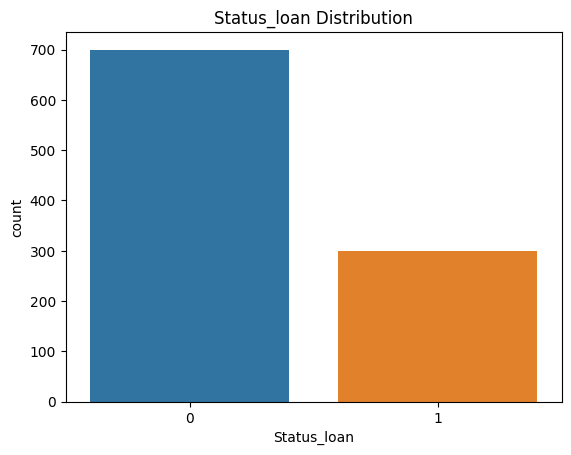


### Numerical Column Distribution ###


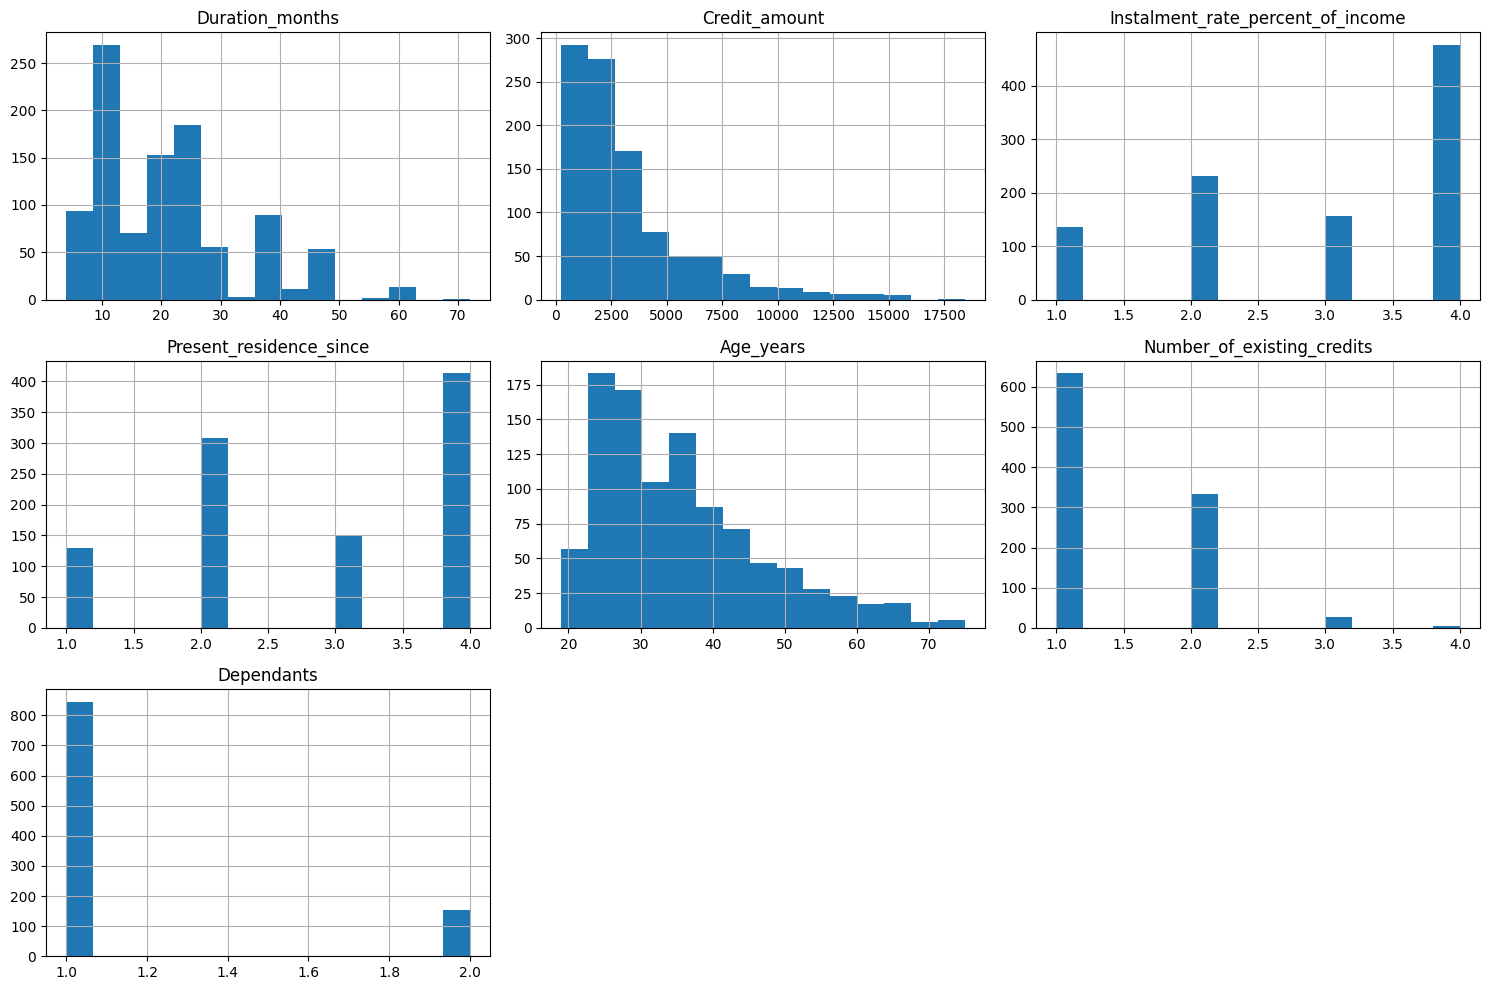


### Correlation Matrix ###


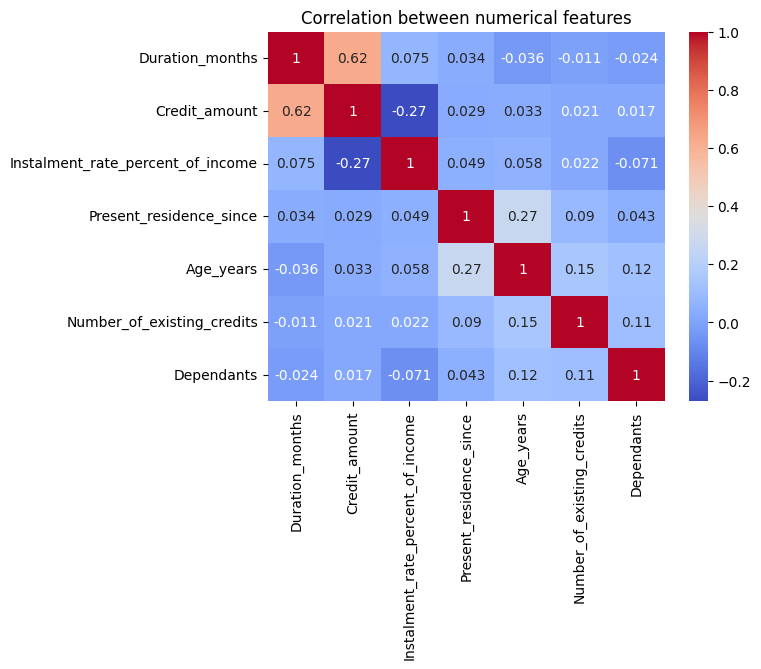

########## ##########


In [12]:
ds_name = 'german'

datasets_path = "../data/raw/"
df, cat_cols, num_cols, target_col = load_data(ds_name, datasets_path)
print("########## " + ds_name + " ##########")
print(df.head())
X = df.loc[:, num_cols + cat_cols]
y = df.loc[:, target_col]

explore_dataset(df, cat_cols, num_cols, target_col)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)
cat_dims = get_cat_dims(X_train, cat_cols)

# preprocess data
num_prep = make_pipeline(SimpleImputer(strategy='mean'),
                        MinMaxScaler())
cat_prep = make_pipeline(SimpleImputer(strategy='most_frequent'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
prep = ColumnTransformer([
    ('num', num_prep, num_cols),
    ('cat', cat_prep, cat_cols)],
    remainder='drop')
print("########## ##########")

In [38]:
X_train_trans = prep.fit_transform(X_train)
X_test_trans = prep.transform(X_test)
smote = SMOTE(random_state=2020)
X_train_smote, y_train_smote = smote.fit_resample(X_train_trans, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_smote, y_train_smote)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

After SMOTE, counts of label '1': 33256
After SMOTE, counts of label '0': 33256
Confusion Matrix:
[[3495  208]
 [1150  147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      3703
           1       0.41      0.11      0.18      1297

    accuracy                           0.73      5000
   macro avg       0.58      0.53      0.51      5000
weighted avg       0.66      0.73      0.67      5000



In [18]:
adasyn = ADASYN(random_state=2020)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_trans, y_train)

print("After ADASYN, counts of label '1': {}".format(sum(y_train_adasyn == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_adasyn == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_adasyn, y_train_adasyn)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

After ADASYN, counts of label '1': 617
After ADASYN, counts of label '0': 626
Confusion Matrix:
[[65  9]
 [12 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.61      0.54      0.57        26

    accuracy                           0.79       100
   macro avg       0.73      0.71      0.72       100
weighted avg       0.78      0.79      0.79       100



In [37]:
adasyn = ADASYN(random_state=2020)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_trans, y_train)

print("After ADASYN, counts of label '1': {}".format(sum(y_train_adasyn == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_adasyn == 0)))

# Apply Edited Nearest Neighbours (ENN) to clean the data
enn = EditedNearestNeighbours()
X_train_adasyn_enn, y_train_adasyn_enn = enn.fit_resample(X_train_adasyn, y_train_adasyn)

print("After ENN, counts of label '1': {}".format(sum(y_train_adasyn_enn == 1)))
print("After ENN, counts of label '0': {}".format(sum(y_train_adasyn_enn == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_adasyn_enn, y_train_adasyn_enn)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

After ADASYN, counts of label '1': 35458
After ADASYN, counts of label '0': 33256


KeyboardInterrupt: 

In [25]:
# ds_name = 'german'
# ds_name = 'taiwan'
ds_name = 'pakdd'
# ds_name = 'homeeq'
# ds_name = 'gmsc'


datasets_path = "../data/raw/"
df, cat_cols, num_cols, target_col = load_data(ds_name, datasets_path)
print("########## " + ds_name + " ##########")
# print(df.head())
X = df.loc[:, num_cols + cat_cols]
y = df.loc[:, target_col]

# explore_dataset(df, cat_cols, num_cols, target_col)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)
cat_dims = get_cat_dims(X_train, cat_cols)

# preprocess data
num_prep = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
cat_prep = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))
prep = ColumnTransformer([
    ('num', num_prep, num_cols),
    ('cat', cat_prep, cat_cols)],
    remainder='drop')

X_train_trans = prep.fit_transform(X_train)
X_test_trans = prep.transform(X_test)

print("################################")
smote = SMOTE(random_state=2020)
X_train_smote, y_train_smote = smote.fit_resample(X_train_trans, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_smote, y_train_smote)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



print("################################")
adasyn = ADASYN(random_state=2020)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_trans, y_train)

print("After ADASYN, counts of label '1': {}".format(sum(y_train_adasyn == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_adasyn == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_adasyn, y_train_adasyn)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



print("################################")
adasyn = ADASYN(random_state=2020)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_trans, y_train)

print("After ADASYN, counts of label '1': {}".format(sum(y_train_adasyn == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_adasyn == 0)))

# Apply Edited Nearest Neighbours (ENN) to clean the data
enn = EditedNearestNeighbours()
X_train_adasyn_enn, y_train_adasyn_enn = enn.fit_resample(X_train_adasyn, y_train_adasyn)

print("After ENN, counts of label '1': {}".format(sum(y_train_adasyn_enn == 1)))
print("After ENN, counts of label '0': {}".format(sum(y_train_adasyn_enn == 0)))

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=2020)
classifier.fit(X_train_adasyn_enn, y_train_adasyn_enn)

# Predictions on test data
y_pred = classifier.predict(X_test_trans)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


INFO:root:Dataloader: Loaded dataset: pakdd. Returning data.


########## pakdd ##########
################################
After SMOTE, counts of label '1': 33256
After SMOTE, counts of label '0': 33256
Confusion Matrix:
[[3495  208]
 [1150  147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      3703
           1       0.41      0.11      0.18      1297

    accuracy                           0.73      5000
   macro avg       0.58      0.53      0.51      5000
weighted avg       0.66      0.73      0.67      5000

################################
After ADASYN, counts of label '1': 35458
After ADASYN, counts of label '0': 33256
Confusion Matrix:
[[3505  198]
 [1158  139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      3703
           1       0.41      0.11      0.17      1297

    accuracy                           0.73      5000
   macro avg       0.58      0.53      0.50      5000
weighte

In [53]:
resampling_methods = {
    'ros': RandomOverSampler(random_state=2020),
    'rus': RandomUnderSampler(random_state=2020),
    'nearmiss': NearMiss(version=1, n_neighbors=3),
    'enn': EditedNearestNeighbours(),
    'tomek': TomekLinks(),
    'smote': SMOTE(random_state=2020),
    'smote_bs1': BorderlineSMOTE(kind='borderline-1', random_state=2020),
    'smote_bs2': BorderlineSMOTE(kind='borderline-2', random_state=2020),
    'smote_enn': SMOTEENN(random_state=2020),
    'smote_tomek': SMOTETomek(random_state=2020),
    'adasyn': ADASYN(random_state=2020)
}

# Classifiers
classifiers = {
    'rf': RandomForestClassifier(random_state=2020),
    'ada': AdaBoostClassifier(random_state=2020),
    'gb': GradientBoostingClassifier(random_state=2020)
}

def preprocess_data(X_train, X_test, num_cols, cat_cols):
    num_prep = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
    cat_prep = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))
    prep = ColumnTransformer([('num', num_prep, num_cols), ('cat', cat_prep, cat_cols)], remainder='drop')
    X_train_trans = prep.fit_transform(X_train)
    X_test_trans = prep.transform(X_test)
    return X_train_trans, X_test_trans

def resample_data(X, y, method):
    resampler = resampling_methods.get(method)
    if resampler:
        return resampler.fit_resample(X, y)
    raise ValueError(f"Resampling method '{method}' not found.")

def train_classifier(X_train, y_train, clf_type):
    clf = classifiers.get(clf_type)
    if clf is not None:
        clf.fit(X_train, y_train)
        return clf
    raise ValueError(f"Classifier '{clf_type}' not found.")

# def evaluate_model(clf, X_test, y_test):
#     y_pred = clf.predict(X_test)
#     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#     print("\nClassification Report:\n", classification_report(y_test, y_pred))

def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # Assuming binary classification for AUC metrics
    
    # Confusion Matrix and Classification Report
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print(f"\nF1-Score: {f1:.4f}")
    
    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC: {roc_auc:.4f}")
    
    # AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    print(f"AUC-PR: {auc_pr:.4f}")



def run_pipeline(X, y, num_cols, cat_cols, resample_method='ros', clf_type='rf', test_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2020)
    X_train_trans, X_test_trans = preprocess_data(X_train, X_test, num_cols, cat_cols)
    X_res, y_res = resample_data(X_train_trans, y_train, resample_method)
    clf = train_classifier(X_res, y_res, clf_type)
    evaluate_model(clf, X_test_trans, y_test)

# Iterate over all resampling methods and classifiers
def iterate_resampling_and_classifiers(X, y, num_cols, cat_cols):
    for resample_method in resampling_methods:
        for clf_type in classifiers:
            print(f"\n### Running {resample_method} with {clf_type} ###")
            run_pipeline(X, y, num_cols, cat_cols, resample_method, clf_type)

# Load data
def load_and_run_pipeline(ds_name, datasets_path):
    df, cat_cols, num_cols, target_col = load_data(ds_name, datasets_path)
    print("########## Dataset:", ds_name, "##########")
    
    X = df.loc[:, num_cols + cat_cols]
    y = df.loc[:, target_col]
    
    # Run pipeline across all resampling methods and classifiers
    iterate_resampling_and_classifiers(X, y, num_cols, cat_cols)

def run_all_datasets(datasets, datasets_path):
    for ds_name in datasets:
        print(f"\nProcessing dataset: {ds_name}")
        load_and_run_pipeline(ds_name, datasets_path)

In [54]:
datasets_path = "../data/raw/"
datasets = ['german', 'taiwan', 'pakdd', 'homeeq', 'gmsc']
run_all_datasets(datasets, datasets_path)


INFO:root:Dataloader: Loaded dataset: german. Returning data.



Processing dataset: german
########## Dataset: german ##########

### Running ros with rf ###
Confusion Matrix:
 [[64 10]
 [13 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        74
           1       0.57      0.50      0.53        26

    accuracy                           0.77       100
   macro avg       0.70      0.68      0.69       100
weighted avg       0.76      0.77      0.77       100


### Running ros with ada ###
Confusion Matrix:
 [[56 18]
 [ 7 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        74
           1       0.51      0.73      0.60        26

    accuracy                           0.75       100
   macro avg       0.70      0.74      0.71       100
weighted avg       0.79      0.75      0.76       100


### Running ros with gb ###
Confusion Matrix:
 [[59 15]
 [ 7 19]]

Classification Report:
    

INFO:root:Dataloader: Loaded dataset: taiwan. Returning data.


########## Dataset: taiwan ##########

### Running ros with rf ###
Confusion Matrix:
 [[2177  158]
 [ 371  294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      2335
           1       0.65      0.44      0.53       665

    accuracy                           0.82      3000
   macro avg       0.75      0.69      0.71      3000
weighted avg       0.81      0.82      0.81      3000


### Running ros with ada ###
Confusion Matrix:
 [[1894  441]
 [ 235  430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      2335
           1       0.49      0.65      0.56       665

    accuracy                           0.77      3000
   macro avg       0.69      0.73      0.70      3000
weighted avg       0.80      0.77      0.78      3000


### Running ros with gb ###
Confusion Matrix:
 [[1907  428]
 [ 237  428]]

Classification Report:
        

KeyboardInterrupt: 